<a href="https://colab.research.google.com/github/Bigdata92/190902AdvancedVisualPerception/blob/master/Weight_Initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.noise import AlphaDropout
from keras.preprocessing.text import Tokenizer

max_words = 1000
batch_size = 16
epochs = 40
plot = True

Using TensorFlow backend.


In [0]:
def create_network(n_dense=6, #뉴런 개수
                   dense_units=16,
                   activation='selu',
                   dropout=AlphaDropout,
                   dropout_rate=0.1,
                   kernel_initializer='lecun_normal',
                   optimizer='adam',
                   num_classes=1,
                   max_words=max_words):
    """Generic function to create a fully-connected neural network.

    # Arguments
        n_dense: int > 0. Number of dense layers.
        dense_units: int > 0. Number of dense units per layer.
        dropout: keras.layers.Layer. A dropout layer to apply.
        dropout_rate: 0 <= float <= 1. The rate of dropout.
        kernel_initializer: str. The initializer for the weights.
        optimizer: str/keras.optimizers.Optimizer. The optimizer to use.
        num_classes: int > 0. The number of classes to predict.
        max_words: int > 0. The maximum number of words per data point.

    # Returns
        A Keras model instance (compiled).
    """
    model = Sequential()
    model.add(Dense(dense_units, input_shape=(max_words,),
                    kernel_initializer=kernel_initializer))
    model.add(Activation(activation))
    model.add(dropout(dropout_rate))

    for i in range(n_dense - 1):
        model.add(Dense(dense_units, kernel_initializer=kernel_initializer))
        model.add(Activation(activation))
        model.add(dropout(dropout_rate))

    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [0]:
network1 = {
    'n_dense': 6,
    'dense_units': 16,
    'activation': 'relu',
    'dropout': Dropout,
    'dropout_rate': 0.5,
    'kernel_initializer': 'glorot_uniform',
    'optimizer': 'sgd'
}

In [0]:
network2 = {
    'n_dense': 6,
    'dense_units': 16,
    'activation': 'selu',
    'dropout': AlphaDropout,
    'dropout_rate': 0.1,
    'kernel_initializer': 'lecun_normal',
    'optimizer': 'sgd'
}

In [5]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
2113536/2110848 [==============================] - 1s 0us/step
8982 train sequences
2246 test sequences


In [6]:
x_train[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 2,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 2,
 2,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 2,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [8]:
y_train[0] # return class 

3

In [9]:
num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

print('Vectorizing sequence data...')
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

46 classes
Vectorizing sequence data...
x_train shape: (8982, 1000)
x_test shape: (2246, 1000)


In [10]:
print('Convert class vector to binary class matrix '
      '(for use with categorical_crossentropy)')
y_train = keras.utils.to_categorical(y_train, num_classes) # category로 change
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (8982, 46)
y_test shape: (2246, 46)


In [11]:
y_train[0] # categorical을 통해 vector로 change

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
print('\nBuilding network 1...') # network 학습 부분

model1 = create_network(num_classes=num_classes, **network1)
history_model1 = model1.fit(x_train,
                            y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1, # training result show 여부
                            validation_split=0.1) # ratio determination

score_model1 = model1.evaluate(x_test, 
                               y_test,
                               batch_size=batch_size,
                               verbose=1)


Building network 1...




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 8083 samples, validate on 899 samples
Epoch 1/40
8083/8083 [==============================] - 8s 986us/step - loss: 3.2992 - acc: 0.3311 - val_loss: 2.7541 - val_acc: 0.3315
Epoch 2/40
8083/8083 [==============================] - 2s 288us/step - loss: 2.7018 - acc: 0.3505 - val_loss: 2.5737 - val_acc: 0.3315
Epoch 3/40
8083/8083 [==============================] - 2s 298us/step - loss: 2.5750 - acc: 0.3522 - val_loss: 2.5062 - val_acc: 0.3315
Epoch 4/40
8083/8083 [==============================] - 2s 299us/step - loss: 2.5202 - acc: 0.3542 - val_loss: 2.4816 - val_acc: 0.3315
Epoch 5/40
8083/8083 [==============================] - 2s 303us/step - loss: 2.4925 - acc: 0.3538 - val_loss: 2.4731 - val_acc: 0.3315
Epoch 6/40
8083/8083 [=============

In [13]:
print('\nBuilding network 2...')
model2 = create_network(num_classes=num_classes, **network2)

history_model2 = model2.fit(x_train,
                            y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_split=0.1)

score_model2 = model2.evaluate(x_test,
                               y_test,
                               batch_size=batch_size,
                               verbose=1)


Building network 2...
Train on 8083 samples, validate on 899 samples
Epoch 1/40
8083/8083 [==============================] - 3s 413us/step - loss: 2.8792 - acc: 0.2881 - val_loss: 2.6965 - val_acc: 0.3348
Epoch 2/40
8083/8083 [==============================] - 3s 353us/step - loss: 2.3326 - acc: 0.3999 - val_loss: 2.0541 - val_acc: 0.5239
Epoch 3/40
8083/8083 [==============================] - 3s 354us/step - loss: 2.0949 - acc: 0.4537 - val_loss: 1.9246 - val_acc: 0.5317
Epoch 4/40
8083/8083 [==============================] - 3s 358us/step - loss: 1.9727 - acc: 0.4978 - val_loss: 1.9188 - val_acc: 0.5628
Epoch 5/40
8083/8083 [==============================] - 3s 354us/step - loss: 1.8997 - acc: 0.5131 - val_loss: 1.8972 - val_acc: 0.5717
Epoch 6/40
8083/8083 [==============================] - 3s 355us/step - loss: 1.8370 - acc: 0.5335 - val_loss: 1.8456 - val_acc: 0.5751
Epoch 7/40
8083/8083 [==============================] - 3s 349us/step - loss: 1.7911 - acc: 0.5400 - val_loss: 1.8

In [14]:
print('\nNetwork 1 results')
print('Hyperparameters:', network1)
print('Test score:', score_model1[0])
print('Test accuracy:', score_model1[1])
print('Network 2 results')
print('Hyperparameters:', network2)
print('Test score:', score_model2[0])
print('Test accuracy:', score_model2[1])



Network 1 results
Hyperparameters: {'n_dense': 6, 'dense_units': 16, 'activation': 'relu', 'dropout': <class 'keras.layers.core.Dropout'>, 'dropout_rate': 0.5, 'kernel_initializer': 'glorot_uniform', 'optimizer': 'sgd'}
Test score: 1.9331638880956417
Test accuracy: 0.4096170971145188
Network 2 results
Hyperparameters: {'n_dense': 6, 'dense_units': 16, 'activation': 'selu', 'dropout': <class 'keras.layers.noise.AlphaDropout'>, 'dropout_rate': 0.1, 'kernel_initializer': 'lecun_normal', 'optimizer': 'sgd'}
Test score: 1.5060488593864951
Test accuracy: 0.6647373108012488


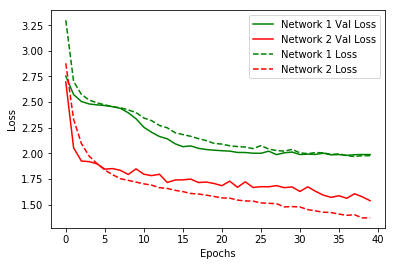

In [15]:
plt.plot(range(epochs),
         history_model1.history['val_loss'], #동일하게 주어도 activation fun 에 따라 Network value difference exists
         'g-',
         label='Network 1 Val Loss')
plt.plot(range(epochs),
         history_model2.history['val_loss'],
         'r-',
         label='Network 2 Val Loss')
plt.plot(range(epochs),
         history_model1.history['loss'],
         'g--',
         label='Network 1 Loss')
plt.plot(range(epochs),
         history_model2.history['loss'],
         'r--',
         label='Network 2 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()